In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")
import string


# Project overview


Steps

1. I want to get a feel for the data:
    - What is the type of the data
    - What kind of features do I have
    - What is the distribution of the data like
    - Correlation betweens features
    
2. Data exploration
    - What are some intuitive ideas about what it would take to survive on the Titanic?
        - Wealthy vs non-wealthy
        - male vs female
        - children vs adults
        - traveling alone vs in groups
        - location on the ship
    - What are the value counts like for features based on the survived vs deceased?
    
    
    
    
 
3. What kind of data manipulation has to be done to create models for this data set?
     - Deal with missing values
         - What data is to be dropped vs imputed
     - How should data be transformed?
         - get_dummies for categorical variables
     - How should data be scaled?
         - Should we do MinMaxScaler or StandardScaler?
         
         
         
         
4. Create all classification models you know
     - Logistic Regression
     - KNN
     - SVM
     - Decision Tree
     - Random Forests
     - Boosting Methods
     - Naive Bayes
     
5. GridSearch best params and find your best model
     - Can show performance emtrics like classification report and plot the confusion matrix
     
     
     
     
6. Conclude the project and make a submission to kaggle**

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

full_df = pd.concat([df_train, df_test], sort=True).reset_index(drop=True)

df_train.name = 'train'
df_test.name = 'test'
full_df.name = 'TT' 

# Step 1:

* I want to get a feel for the data:
    * What is the type of the data
    * What kind of features do I have
    * What is the distribution of the data like
    * Correlation betweens features

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
full_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [6]:
full_df.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [7]:
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
cat = df_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
num = df_train[['Age','SibSp','Parch','Fare']]

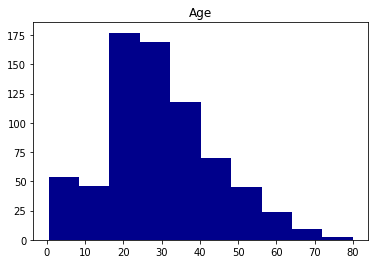

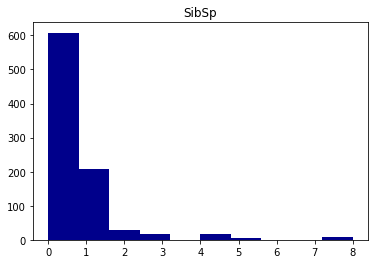

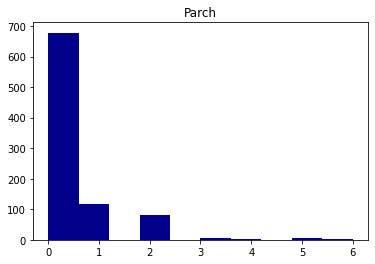

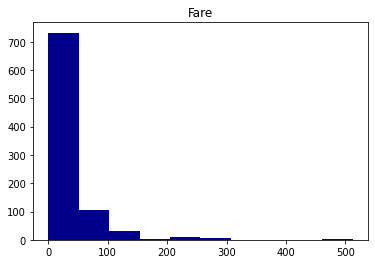

In [9]:
for feature in num.columns:
    plt.hist(num[feature],color = 'darkblue')
    plt.title(feature)
    plt.show()

<AxesSubplot:>

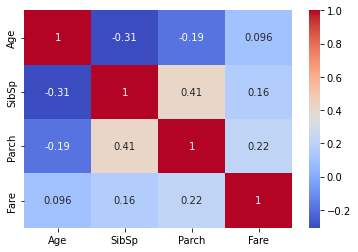

In [10]:
sns.heatmap(num.corr(),annot=True,cmap = 'coolwarm')

2. Data exploration
    - What are some intuitive ideas about what it would take to survive on the Titanic?
        - Wealthy vs non-wealthy
        - male vs female
        - children vs adults
        - traveling alone vs in groups
        - location on the ship
    - What are the value counts like for features based on the survived vs deceased?

In [11]:
pd.pivot_table(df_train,index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [12]:
# Summary of numeric features

# Should create a feature named isChild where it shows survival of people under 14 as younger people had a better chance
# Fare doesn't have a normal distribution but that is kinda expected (first class will never have as many seats as 2nd/3rd)

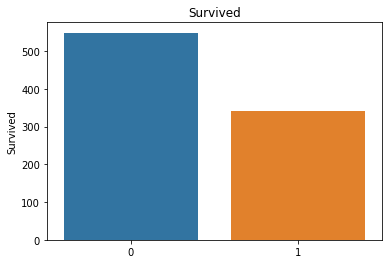

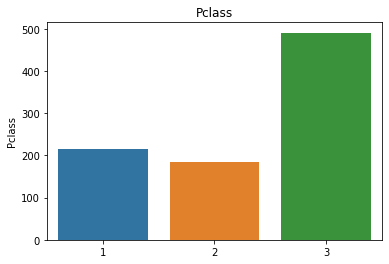

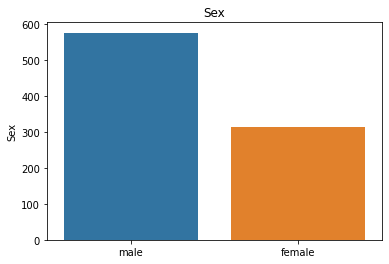

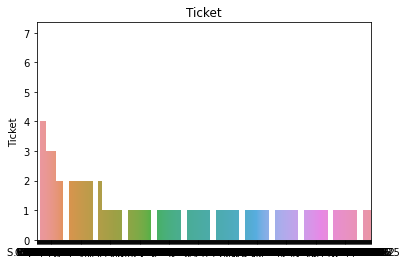

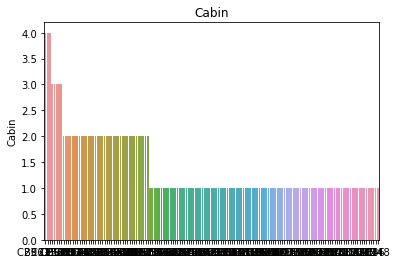

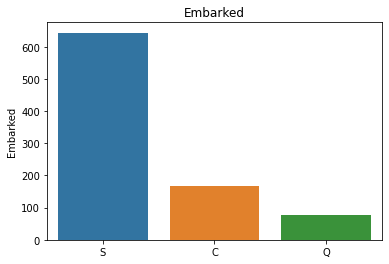

In [13]:
for feature in cat.columns:
    sns.barplot(x = cat[feature].value_counts().index , y = cat[feature].value_counts()).set_title(feature)
    plt.show()

In [14]:
# Summary of categorical features

# Majority came from S so data may be skewed there
# Need to fix Cabin by letter
# Distribution is abround 66-33 deceased vs survived so expect numbers to be around the same if there is nothing fishy with a feature
# Need to check out survival rates for these as it seems lots of features aren't equal

In [15]:
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [16]:
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))

Sex       female  male
Survived              
0             81   468
1            233   109


In [17]:
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [18]:
# Much more likely to survive if you are female
# Cherbourg had a positive survival ratio when overall titanic had negative survival ratio
# Much more likely to survive if from Pclass 1 than any other class

3. What kind of data manipulation has to be done to create models for this data set?
     - Deal with missing values
         - What data is to be dropped vs imputed
         
     - Feature engineering
         - Change cabin to be by letter 
         - Change ticket to be number or alpha numeric
         - Add a column that states isChild
                  
     - How should data be transformed?
         - get_dummies for categorical variables
         
     - How should data be scaled?
         - Should we do MinMaxScaler or StandardScaler?

In [19]:
full_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [20]:
# df.dropna(subset=['Embarked'],inplace = True)
# df_test.dropna(subset=['Embarked'],inplace = True)

full_df['Age'] = full_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
# going to explore Fare further since there is only one
# full_df['Fare'].fillna(full_df.Fare.median(),inplace= True)


# Going to try to fill Embarked in with mode of Embarked instead

full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace = True)



In [21]:
full_df[full_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [22]:
# Going to fill in based on alone male in class 3
full_df['Fare'] = full_df['Fare'].fillna(full_df.groupby(['Pclass','Parch','SibSp']).Fare.median()[3][0][0])

In [23]:
full_df.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [24]:
full_df.Cabin

0        NaN
1        C85
2        NaN
3       C123
4        NaN
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object

In [25]:
full_df['cabin_letter'] = full_df.Cabin.apply(lambda x: str(x)[0])
full_df['cabin_letter'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_letter, dtype: int64

In [26]:
full_df[full_df['cabin_letter']=='T']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,cabin_letter
339,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,340,1,male,0,0.0,113784,T


In [27]:
full_df.loc[339]

Age                                     45.0
Cabin                                      T
Embarked                                   S
Fare                                    35.5
Name            Blackwell, Mr. Stephen Weart
Parch                                      0
PassengerId                              340
Pclass                                     1
Sex                                     male
SibSp                                      0
Survived                                 0.0
Ticket                                113784
cabin_letter                               T
Name: 339, dtype: object

In [28]:
full_df['cabin_letter'].replace('T','A',inplace=True)

In [29]:
full_df.loc[339]

Age                                     45.0
Cabin                                      T
Embarked                                   S
Fare                                    35.5
Name            Blackwell, Mr. Stephen Weart
Parch                                      0
PassengerId                              340
Pclass                                     1
Sex                                     male
SibSp                                      0
Survived                                 0.0
Ticket                                113784
cabin_letter                               A
Name: 339, dtype: object

<AxesSubplot:xlabel='cabin_letter', ylabel='count'>

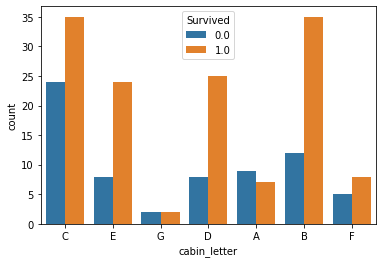

In [30]:
sns.countplot(data=full_df[-(full_df.cabin_letter == 'n')],x = 'cabin_letter', hue = 'Survived' )


In [31]:
#  Best group these cabins letters since survival depends on it

full_df['cabin_letter'] = full_df['cabin_letter'].replace(['A', 'B', 'C'], 'ABC')
full_df['cabin_letter'] = full_df['cabin_letter'].replace(['D', 'E'], 'DE')
full_df['cabin_letter'] = full_df['cabin_letter'].replace(['F', 'G'], 'FG')

full_df['cabin_letter'].value_counts()

n      1014
ABC     182
DE       87
FG       26
Name: cabin_letter, dtype: int64

In [32]:
full_df = full_df.drop('Cabin',axis =1 )
full_df.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket', 'cabin_letter'],
      dtype='object')

In [33]:
# Creating some variables that seem important

full_df['Family_Size'] = full_df['SibSp']+full_df['Parch']+1

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
full_df['Family_Size_Grouped'] = full_df['Family_Size'].map(family_map)

full_df['Ticket_Frequency'] = full_df.groupby('Ticket')['Ticket'].transform('count')

full_df['Title'] = full_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]



# def conditions(row):
#     if row.Age < 16:
#         return 1
#     else:
#         return 0
            

# full_df['Child'] = full_df.apply(conditions, axis=1)



In [34]:
# Dividing people into bins by fare and age
full_df['Fare'] = pd.qcut(full_df['Fare'], 13)
full_df['Age'] = pd.qcut(full_df['Age'], 10, duplicates = 'drop')

In [35]:
full_df['Title'] = full_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

full_df['Title'] = full_df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
full_df['Title'] = full_df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')



full_df['Is_Married'] = 0
full_df['Is_Married'].loc[full_df['Title'] == 'Mrs'] = 1

In [36]:
full_df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,cabin_letter,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,"(21.0, 22.0]",S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,n,2,Small,1,Mr,0
1,"(34.0, 40.0]",C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,2,Small,2,Miss/Mrs/Ms,0
2,"(25.0, 26.0]",S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,n,1,Alone,1,Miss/Mrs/Ms,0
3,"(34.0, 40.0]",S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,2,Small,2,Miss/Mrs/Ms,0
4,"(34.0, 40.0]",S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,n,1,Alone,1,Mr,0


In [37]:
full_df.Title.value_counts()

Mr                          757
Miss/Mrs/Ms                 465
Master                       61
Dr/Military/Noble/Clergy     26
Name: Title, dtype: int64

In [38]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

full_df['Family'] = extract_surname(full_df['Name'])
df_train = full_df.loc[:890]
df_test = full_df.loc[891:]
dfs = [df_train, df_test]

In [39]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]
        
print(df_train.shape)
print(df_test.shape)

(891, 18)
(418, 18)


In [40]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [41]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2

    
print(df_train.shape)
print(df_test.shape)

(891, 24)
(418, 24)


In [42]:
print(df_train.info())
print(df_test.info())
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      891 non-null    category
 1   Embarked                 891 non-null    object  
 2   Fare                     891 non-null    category
 3   Name                     891 non-null    object  
 4   Parch                    891 non-null    int64   
 5   PassengerId              891 non-null    int64   
 6   Pclass                   891 non-null    int64   
 7   Sex                      891 non-null    object  
 8   SibSp                    891 non-null    int64   
 9   Survived                 891 non-null    float64 
 10  Ticket                   891 non-null    object  
 11  cabin_letter             891 non-null    object  
 12  Family_Size              891 non-null    int64   
 13  Family_Size_Grouped      891 non-null    object  
 14  Ticket_Fre

In [43]:
# Time to prepare the data for the model



non_numeric_features = ['Embarked', 'Sex', 'cabin_letter', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])
        
print(df_train.shape)
print(df_test.shape)

(891, 24)
(418, 24)


In [44]:
cat_features = ['Pclass', 'Sex', 'cabin_letter', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

print(df_train.shape)
print(df_test.shape)
print(df_train.info())
print(df_test.info())
print(full_df.info())

(891, 44)
(418, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      891 non-null    int64  
 1   Embarked                 891 non-null    int64  
 2   Fare                     891 non-null    int64  
 3   Name                     891 non-null    object 
 4   Parch                    891 non-null    int64  
 5   PassengerId              891 non-null    int64  
 6   Pclass                   891 non-null    int64  
 7   Sex                      891 non-null    int64  
 8   SibSp                    891 non-null    int64  
 9   Survived                 891 non-null    float64
 10  Ticket                   891 non-null    object 
 11  cabin_letter             891 non-null    int64  
 12  Family_Size              891 non-null    int64  
 13  Family_Size_Grouped      891 non-null    int64  
 14  Ticket

In [45]:
drop_cols = ['cabin_letter', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped',
             'Name', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title','PassengerId',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

df_train = df_train.drop(drop_cols,axis=1)

df_test= df_test.drop(drop_cols,axis=1)


In [46]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    891 non-null    int64  
 1   Fare                   891 non-null    int64  
 2   Survived               891 non-null    float64
 3   Ticket_Frequency       891 non-null    int64  
 4   Is_Married             891 non-null    int64  
 5   Survival_Rate          891 non-null    float64
 6   Survival_Rate_NA       891 non-null    float64
 7   Pclass_1               891 non-null    float64
 8   Pclass_2               891 non-null    float64
 9   Pclass_3               891 non-null    float64
 10  Sex_1                  891 non-null    float64
 11  Sex_2                  891 non-null    float64
 12  cabin_letter_1         891 non-null    float64
 13  cabin_letter_2         891 non-null    float64
 14  cabin_letter_3         891 non-null    float64
 15  cabin_

In [47]:
# performing le train test split
X_train = df_train.drop('Survived',axis =1)
y_train = df_train['Survived']
X_test = df_test.drop('Survived',axis=1)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
base_lr = LogisticRegression(max_iter = 3000)
from sklearn.svm import SVR
base_svm = SVR()
from sklearn.neighbors import KNeighborsClassifier
base_knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
base_tree = DecisionTreeClassifier(random_state = 1)
from sklearn.ensemble import RandomForestClassifier
base_rf = RandomForestClassifier(random_state = 1)
from sklearn.naive_bayes import GaussianNB
base_gnb = GaussianNB()
from sklearn.ensemble import GradientBoostingClassifier
base_gbc = GradientBoostingClassifier()
from sklearn.ensemble import AdaBoostClassifier
base_abc = AdaBoostClassifier()



all_base_models = [base_lr,base_rf,base_svm,base_tree,base_knn,base_gnb,base_gbc,base_abc]

In [50]:
for model in all_base_models: 
    cv = cross_val_score(model,scaled_X_train,y_train,cv=10)
    print(model)
    print(cv)
    print(cv.mean())
    print()

LogisticRegression(max_iter=3000)
[0.84444444 0.8988764  0.7752809  0.8988764  0.82022472 0.79775281
 0.82022472 0.82022472 0.92134831 0.88764045]
0.8484893882646691

RandomForestClassifier(random_state=1)
[0.86666667 0.82022472 0.74157303 0.87640449 0.87640449 0.83146067
 0.86516854 0.7752809  0.86516854 0.86516854]
0.8383520599250935

SVR()
[0.5651524  0.32195306 0.39004164 0.57216984 0.55236011 0.43630455
 0.48000236 0.35654407 0.54007665 0.56071695]
0.47753216259021125

DecisionTreeClassifier(random_state=1)
[0.77777778 0.82022472 0.75280899 0.85393258 0.83146067 0.76404494
 0.83146067 0.78651685 0.87640449 0.83146067]
0.8126092384519351

KNeighborsClassifier()
[0.8        0.82022472 0.73033708 0.84269663 0.8988764  0.80898876
 0.85393258 0.80898876 0.83146067 0.86516854]
0.826067415730337

GaussianNB()
[0.8        0.7752809  0.76404494 0.75280899 0.80898876 0.76404494
 0.82022472 0.78651685 0.85393258 0.88764045]
0.8013483146067417

GradientBoostingClassifier()
[0.83333333 0.87640

In [51]:
# Will be grid searching top 3 cross vallers
# GradientBoostingClassifier
# KNeighborsClassifier
# RandomForestClassifier

In [52]:

# # # Logistic Regression grid
# # penalty = ['l1','l2','elasticnet']
# # solver = ['saga','lbfgs']
# # C = [0.01,0.5,0.75,1,5,10,25]
# # l1_ratio = [0.01,0.5,1]
# # param_grid_lr = {'penalty':penalty,'C':C, 'solver':solver, 'l1_ratio':l1_ratio}
# # Score : 0.75837

# # Gradient Boost grid
# n_estimators = [1,5,10,20,40,100]
# max_depth = [3,4,5,6]
# param_grid_gbc = {"n_estimators":n_estimators,'max_depth':max_depth}
# # Score: 0.77272

# # KNeighbors grid
# k_values = list(range(1,31))
# param_grid_knn = {'n_neighbors': k_values}
# Score : 0.75119

# # #Random Forest grid
param_grid_rf = param_grid_rf = {'n_estimators':[64,128,1100],'max_depth':[5,10,15],'min_samples_split':[2,4,6],'min_samples_leaf':[5,10],'max_features':['auto'],'oob_score':[True],'n_jobs':[-1,1],'verbose':[1]}
# # Score: 0.74641


# # Random Forest grid( copied from top 2% ranking notebook)
# param_grid_rf = {'n_estimators':[64,128,1100],'max_depth':[5,10,15],'min_samples_split':[2,4,6],'min_samples_leaf':[5,10],'max_features':['auto'],'oob_score':[True],'n_jobs':[-1,1],'verbose':[1]}


In [53]:
from sklearn.model_selection import GridSearchCV
# # grid_lr_model = GridSearchCV(base_lr,param_grid_lr,cv = 5, verbose = 0)
# grid_gbc_model = GridSearchCV(base_gbc,param_grid_gbc,cv = 10, verbose = 0)
# grid_knn_model = GridSearchCV(base_knn,param_grid_knn,cv = 5, verbose = 0)
grid_rf_model = GridSearchCV(base_rf,param_grid_rf)
# # # top 2% model
# top_model = RandomForestClassifier(bootstrap= True,ccp_alpha= 0.0, class_weight= None,criterion = 'gini',max_depth= 10,max_features= 'auto',max_leaf_nodes= None,max_samples= None,min_impurity_decrease=  0.0,min_samples_leaf= 5,min_samples_split= 2,min_weight_fraction_leaf= 0.0,n_estimators= 1100,
# n_jobs= -1,oob_score= True,random_state= 1,verbose= 1,warm_start=  False)

In [54]:
# # grid_lr_model.fit(scaled_X_train,y_train)
# grid_gbc_model.fit(scaled_X_train,y_train)
# grid_knn_model.fit(scaled_X_train,y_train)
grid_rf_model.fit(scaled_X_train,y_train)
# top_model.fit(scaled_X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of  64 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend wit

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['auto'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [64, 128, 1100], 'n_jobs': [-1, 1],
                         'oob_score': [True], 'verbose': [1]})

In [55]:
# best_params = grid_lr_model.best_estimator_.get_params()
# best_params = grid_gbc_model.best_estimator_.get_params()
# best_params = grid_knn_model.best_estimator_.get_params()
best_params = grid_rf_model.best_estimator_.get_params()
best_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 64,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 1,
 'verbose': 1,
 'warm_start': False}

In [56]:
# # predictions = grid_lr_model.predict(scaled_X_test)
# predictions = grid_gbc_model.predict(scaled_X_test)
# predictions = grid_knn_model.predict(scaled_X_test)
predictions = grid_rf_model.predict(scaled_X_test)
# predictions = top_model.predict(scaled_X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    0.0s finished


In [57]:
predictions = predictions.astype(int)
predictions[:3]

array([0, 1, 0])

In [58]:
submission = pd.DataFrame(data=predictions,columns = ['Survived'])

In [59]:
df_test_passenger = pd.read_csv('/kaggle/input/titanic/test.csv')

In [60]:
submission['PassengerId']=df_test_passenger['PassengerId']

In [61]:
submission.head()

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896


In [62]:
trial = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
trial.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [63]:
submission['Survived'].value_counts()

0    264
1    154
Name: Survived, dtype: int64

In [64]:
submission = submission.iloc[:, ::-1]

In [65]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [66]:
submission.to_csv('submission.csv',index = False)

In [67]:
f = pd.read_csv('submission.csv')

In [68]:
f.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
